In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
from scipy.stats import gaussian_kde
from scipy.io import loadmat
import sys
from scipy.stats import norm
from tqdm import tqdm
import json

In [2]:
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [3]:
# Load data
freqs,Ys,sigmas = np.loadtxt('C_O1_O2_O3.dat',unpack=True)

(39.0, 40.0)

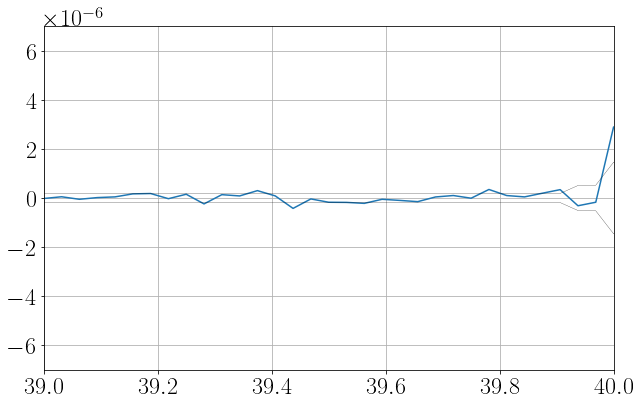

In [6]:
plt.plot(freqs,Ys)
plt.plot(freqs,-sigmas,color='black',lw=0.25)
plt.plot(freqs,sigmas,color='black',lw=0.25)
plt.ylim(-0.7e-5,0.7e-5)
plt.xlim(39,40)

# Constraints on alpha = 0, 2/3, and 3

In [7]:
def calc_broadband_estimators(Y,sig,freqs,alpha=0,fref=25):
    """
    Compute point estimate and error bar from CC spectra by combining frequency bins
    """
    w = (freqs/fref)**alpha
    Ya = Y / w
    siga = sig / w
    cut = np.logical_not(Y==0)
    sigbb = 1/np.sqrt(np.sum(siga[cut]**(-2)))
    Ybb = np.sum(Ya[cut]/siga[cut]**(2)) * sigbb**2
    return Ybb, sigbb